In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
from dateutil import rrule
from datetime import datetime, timedelta
import calendar


In [81]:
%matplotlib inline

In [7]:
df = pd.read_csv('BTCUSD.csv')

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

In [22]:
df.head()

,Symbol,Open,High,Low,Close,Volume From,Volume To
Date,,,,,,,
2014-12-01,BTCUSD,300.0,370.0,300.00,370.0,0.05656,19.53
2014-12-02,BTCUSD,370.0,378.0,370.00,378.0,15.01000,5675.07
2014-12-03,BTCUSD,378.0,378.0,377.01,378.0,0.54660,206.52
2014-12-04,BTCUSD,378.0,378.0,377.10,377.1,0.01000,3.77
2014-12-05,BTCUSD,377.1,377.1,377.10,377.1,0.00000,0.00


## Max Delta##
Max delta is defined as the maximum change in price in a given month
This can either be how much BTC rose or how much it fell from it's peak.

It is considered a rise if the monthly high is before the month's low, else it's considered to be a fall.

In [123]:
start = datetime(2015, 1, 1)
end =  datetime(2017, 12, 1)
monthly_max_delta = {1:[],
                     2:[],
                     3:[],
                     4:[],
                     5:[],
                     6:[],
                     7:[],
                     8:[],
                     9:[],
                     10:[],
                     11:[],
                     12:[]}

for dt in rrule.rrule(rrule.MONTHLY, dtstart=start, until=end):
    first = dt
    open_price = df.loc[dt]['Open']
    last = dt.replace(day = calendar.monthrange(dt.year, dt.month)[1])
    month_mask = (df.index>=first) & (df.index<=last)
    high_date = df[month_mask]['High'].idxmax()
    low_date = df[month_mask]['Low'].idxmin()
    rise = high_date>low_date
    delta = 100*(df.loc[high_date]['High'] - df.loc[low_date]['Low'])/open_price
    if not rise:
        delta = -delta
    monthly_max_delta[dt.month].append(delta)
    

In [124]:
monthly_max_delta = pd.DataFrame.from_dict(monthly_max_delta)
monthly_max_delta.index=[2015, 2016, 2017]
monthly_max_delta.rename(lambda x :calendar.month_name[x], axis=1, inplace=True)

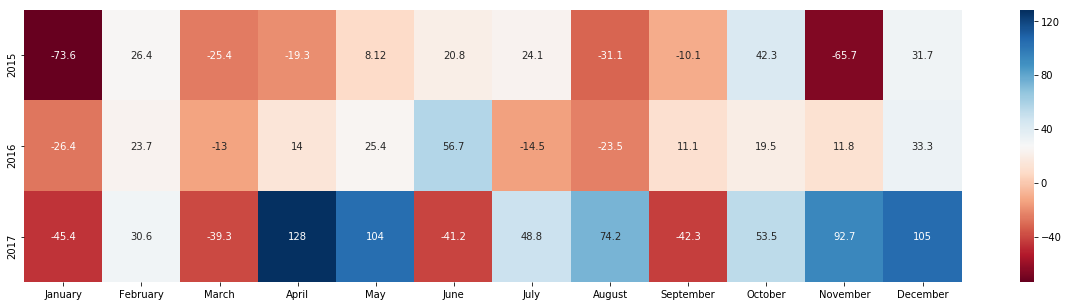

In [133]:
plt.figure(figsize=(21,5))
ax=plt.subplot(111)
sns.heatmap(monthly_max_delta, annot=True, cmap=plt.cm.RdBu, fmt='.3g')

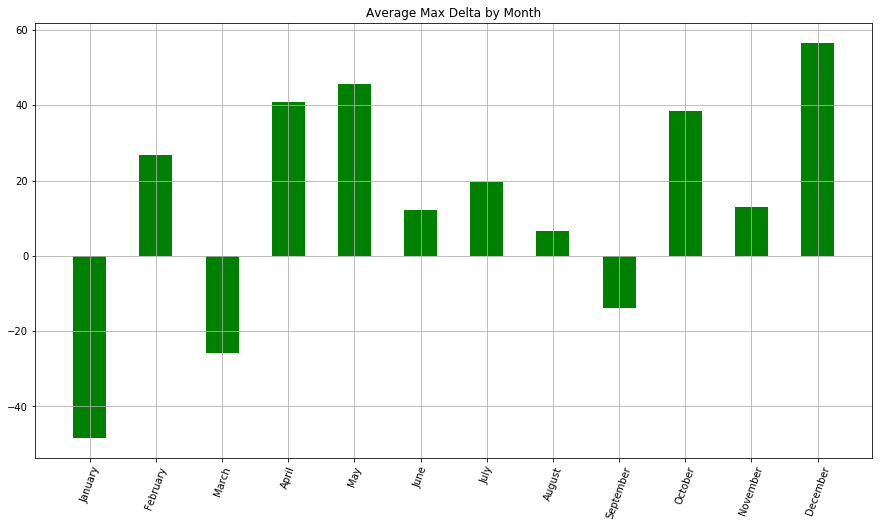

In [156]:
width = 0.5       # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(15,8)
rects1 = ax.bar(range(monthly_max_delta.shape[1]), monthly_max_delta.mean(), width, color='g')
plt.xticks(range(monthly_max_delta.shape[1]), monthly_max_delta.columns,rotation=70)
plt.xticks(rotation=70)
plt.title('Average Max Delta by Month')
plt.grid()

## Monthly Return ##

Monthly return is calculated as the percentage change in the price of BTC each month.

In [137]:
start = datetime(2015, 1, 1)
end =  datetime(2017, 12, 1)
monthly_return = {1:[],
                 2:[],
                 3:[],
                 4:[],
                 5:[],
                 6:[],
                 7:[],
                 8:[],
                 9:[],
                 10:[],
                 11:[],
                 12:[]}

for dt in rrule.rrule(rrule.MONTHLY, dtstart=start, until=end):
    last = dt.replace(day = calendar.monthrange(dt.year, dt.month)[1])
    open_price = df.loc[dt]['Open']
    close_price = df.loc[last]['Close']
    return_perc = 100*(close_price-open_price)/open_price
    monthly_return[dt.month].append(return_perc)   

monthly_return = pd.DataFrame.from_dict(monthly_return)
monthly_return.index=[2015, 2016, 2017]
monthly_return.rename(lambda x :calendar.month_name[x], axis=1, inplace=True)

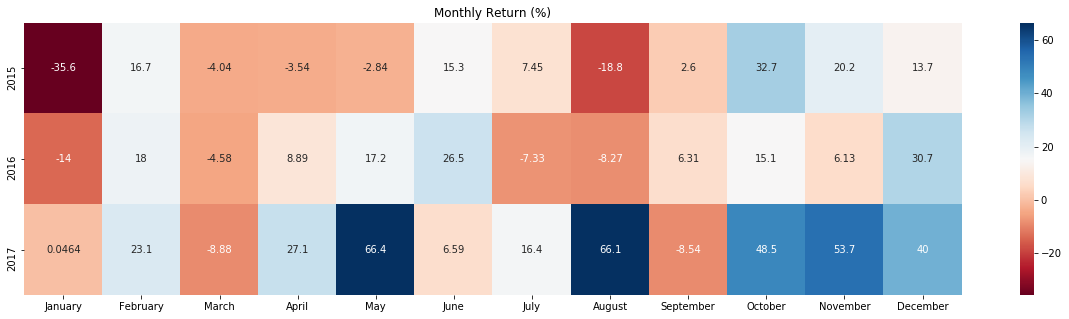

In [157]:
plt.figure(figsize=(21,5))
ax=plt.subplot(111)
plt.title('Monthly Return (%)')
sns.heatmap(monthly_return, annot=True, cmap=plt.cm.RdBu, fmt='.3g')

Text(0.5,1,'Average Returns by Month (%)')

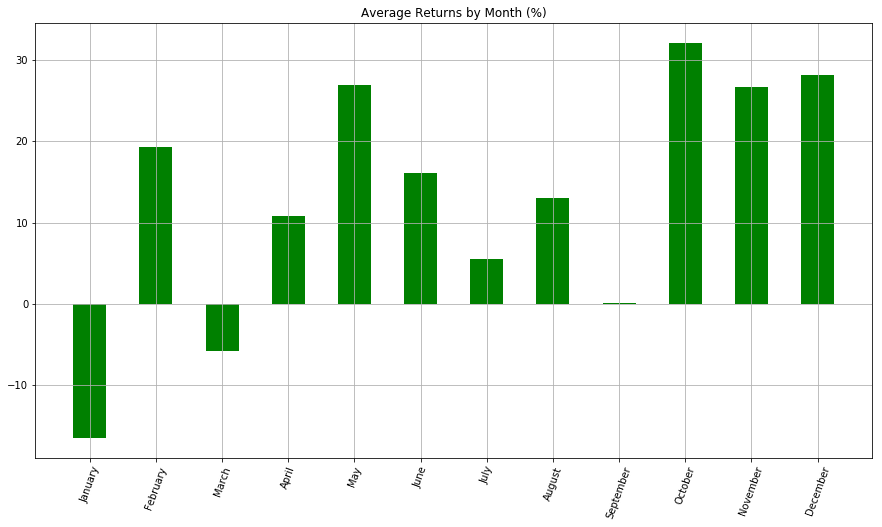

In [158]:
width = 0.5       # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(15,8)
rects1 = ax.bar(range(monthly_return.shape[1]), monthly_return.mean(), width, color='g')
plt.xticks(range(monthly_return.shape[1]), monthly_return.columns,rotation=70)
plt.grid()
plt.title('Average Returns by Month (%)')